In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tf.__version__

'2.7.0'

In [5]:
#gpu = tf.config.list_physical_devices('GPU')[0]
#tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train

11501568/11490434 [==============================] - 8s 1us/step


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
num_pixels = X_train.shape[1] * X_train.shape[2]

In [9]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

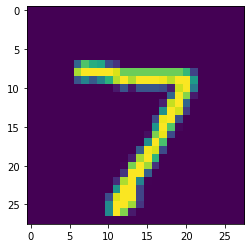

In [10]:
plt.imshow(X_test[0].reshape(28, 28))

In [11]:
y_test[0]

7

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [13]:
y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# Dense

In [14]:
X_train = np.reshape(X_train, (len(X_train), num_pixels))
X_test = np.reshape(X_test, (len(X_test), num_pixels))

In [15]:
X_test.shape

(10000, 784)

In [16]:
input_img = Input((num_pixels, ))
end = Dense(num_classes, activation='softmax')(input_img)

model = Model(input_img, end)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.predict(X_test)[0]

array([0.19673218, 0.06557614, 0.04164413, 0.1398167 , 0.04512599,
       0.1031426 , 0.13426435, 0.10113611, 0.10828964, 0.06427225],
      dtype=float32)

In [18]:
history = model.fit(X_train,
                      y_train,
                      epochs=50,
                      batch_size=1024,
                      shuffle=True,
                      validation_data=(X_test, y_test),
                      verbose=1)

Epoch 1/50
59/59 [==============================] - 1s 6ms/step - loss: 1.5010 - accuracy: 0.5989 - val_loss: 0.9225 - val_accuracy: 0.8098
Epoch 2/50
59/59 [==============================] - 0s 4ms/step - loss: 0.7677 - accuracy: 0.8321 - val_loss: 0.6211 - val_accuracy: 0.8620
Epoch 3/50
59/59 [==============================] - 0s 4ms/step - loss: 0.5805 - accuracy: 0.8639 - val_loss: 0.5082 - val_accuracy: 0.8798
Epoch 4/50
59/59 [==============================] - 0s 4ms/step - loss: 0.4955 - accuracy: 0.8795 - val_loss: 0.4474 - val_accuracy: 0.8917
Epoch 5/50
59/59 [==============================] - 0s 4ms/step - loss: 0.4457 - accuracy: 0.8877 - val_loss: 0.4091 - val_accuracy: 0.8980
Epoch 6/50
59/59 [==============================] - 0s 4ms/step - loss: 0.4129 - accuracy: 0.8938 - val_loss: 0.3833 - val_accuracy: 0.9045
Epoch 7/50
59/59 [==============================] - 0s 3ms/step - loss: 0.3892 - accuracy: 0.8988 - val_loss: 0.3644 - val_accuracy: 0.9063
Epoch 8/50
59/59 [==

In [19]:
model.predict(X_test)[0]

array([1.9973972e-05, 5.8035560e-10, 2.9921381e-05, 5.9850928e-03,
       6.9296675e-07, 2.7318893e-05, 4.5332071e-09, 9.9355078e-01,
       2.6830896e-05, 3.5936368e-04], dtype=float32)

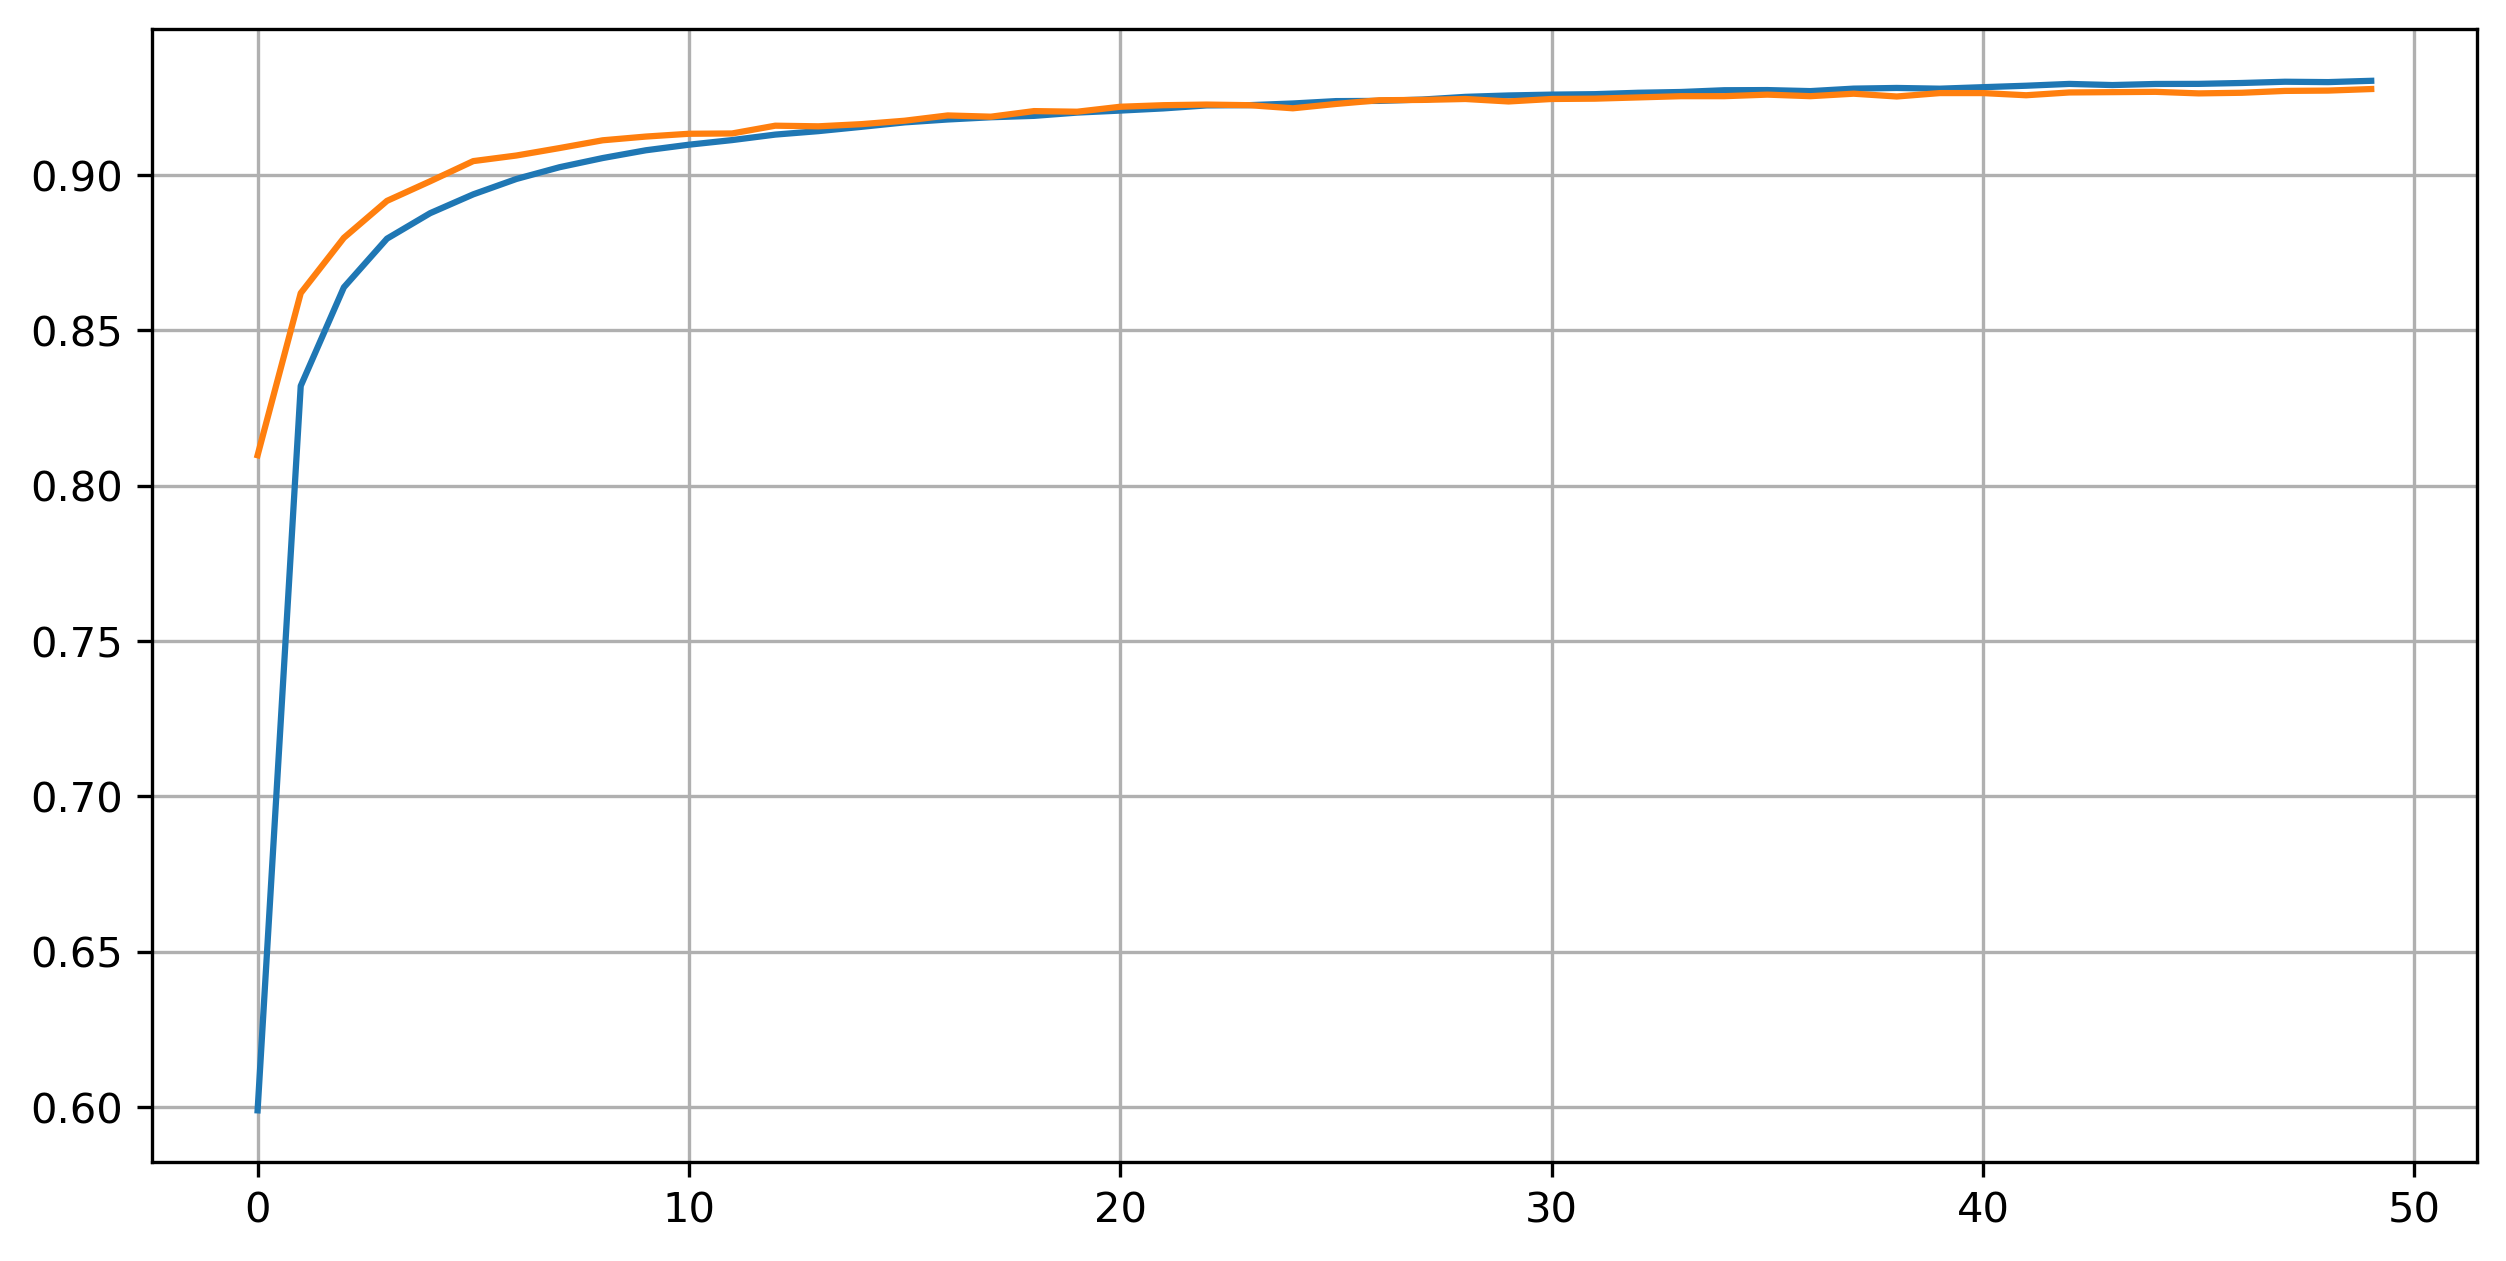

In [20]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


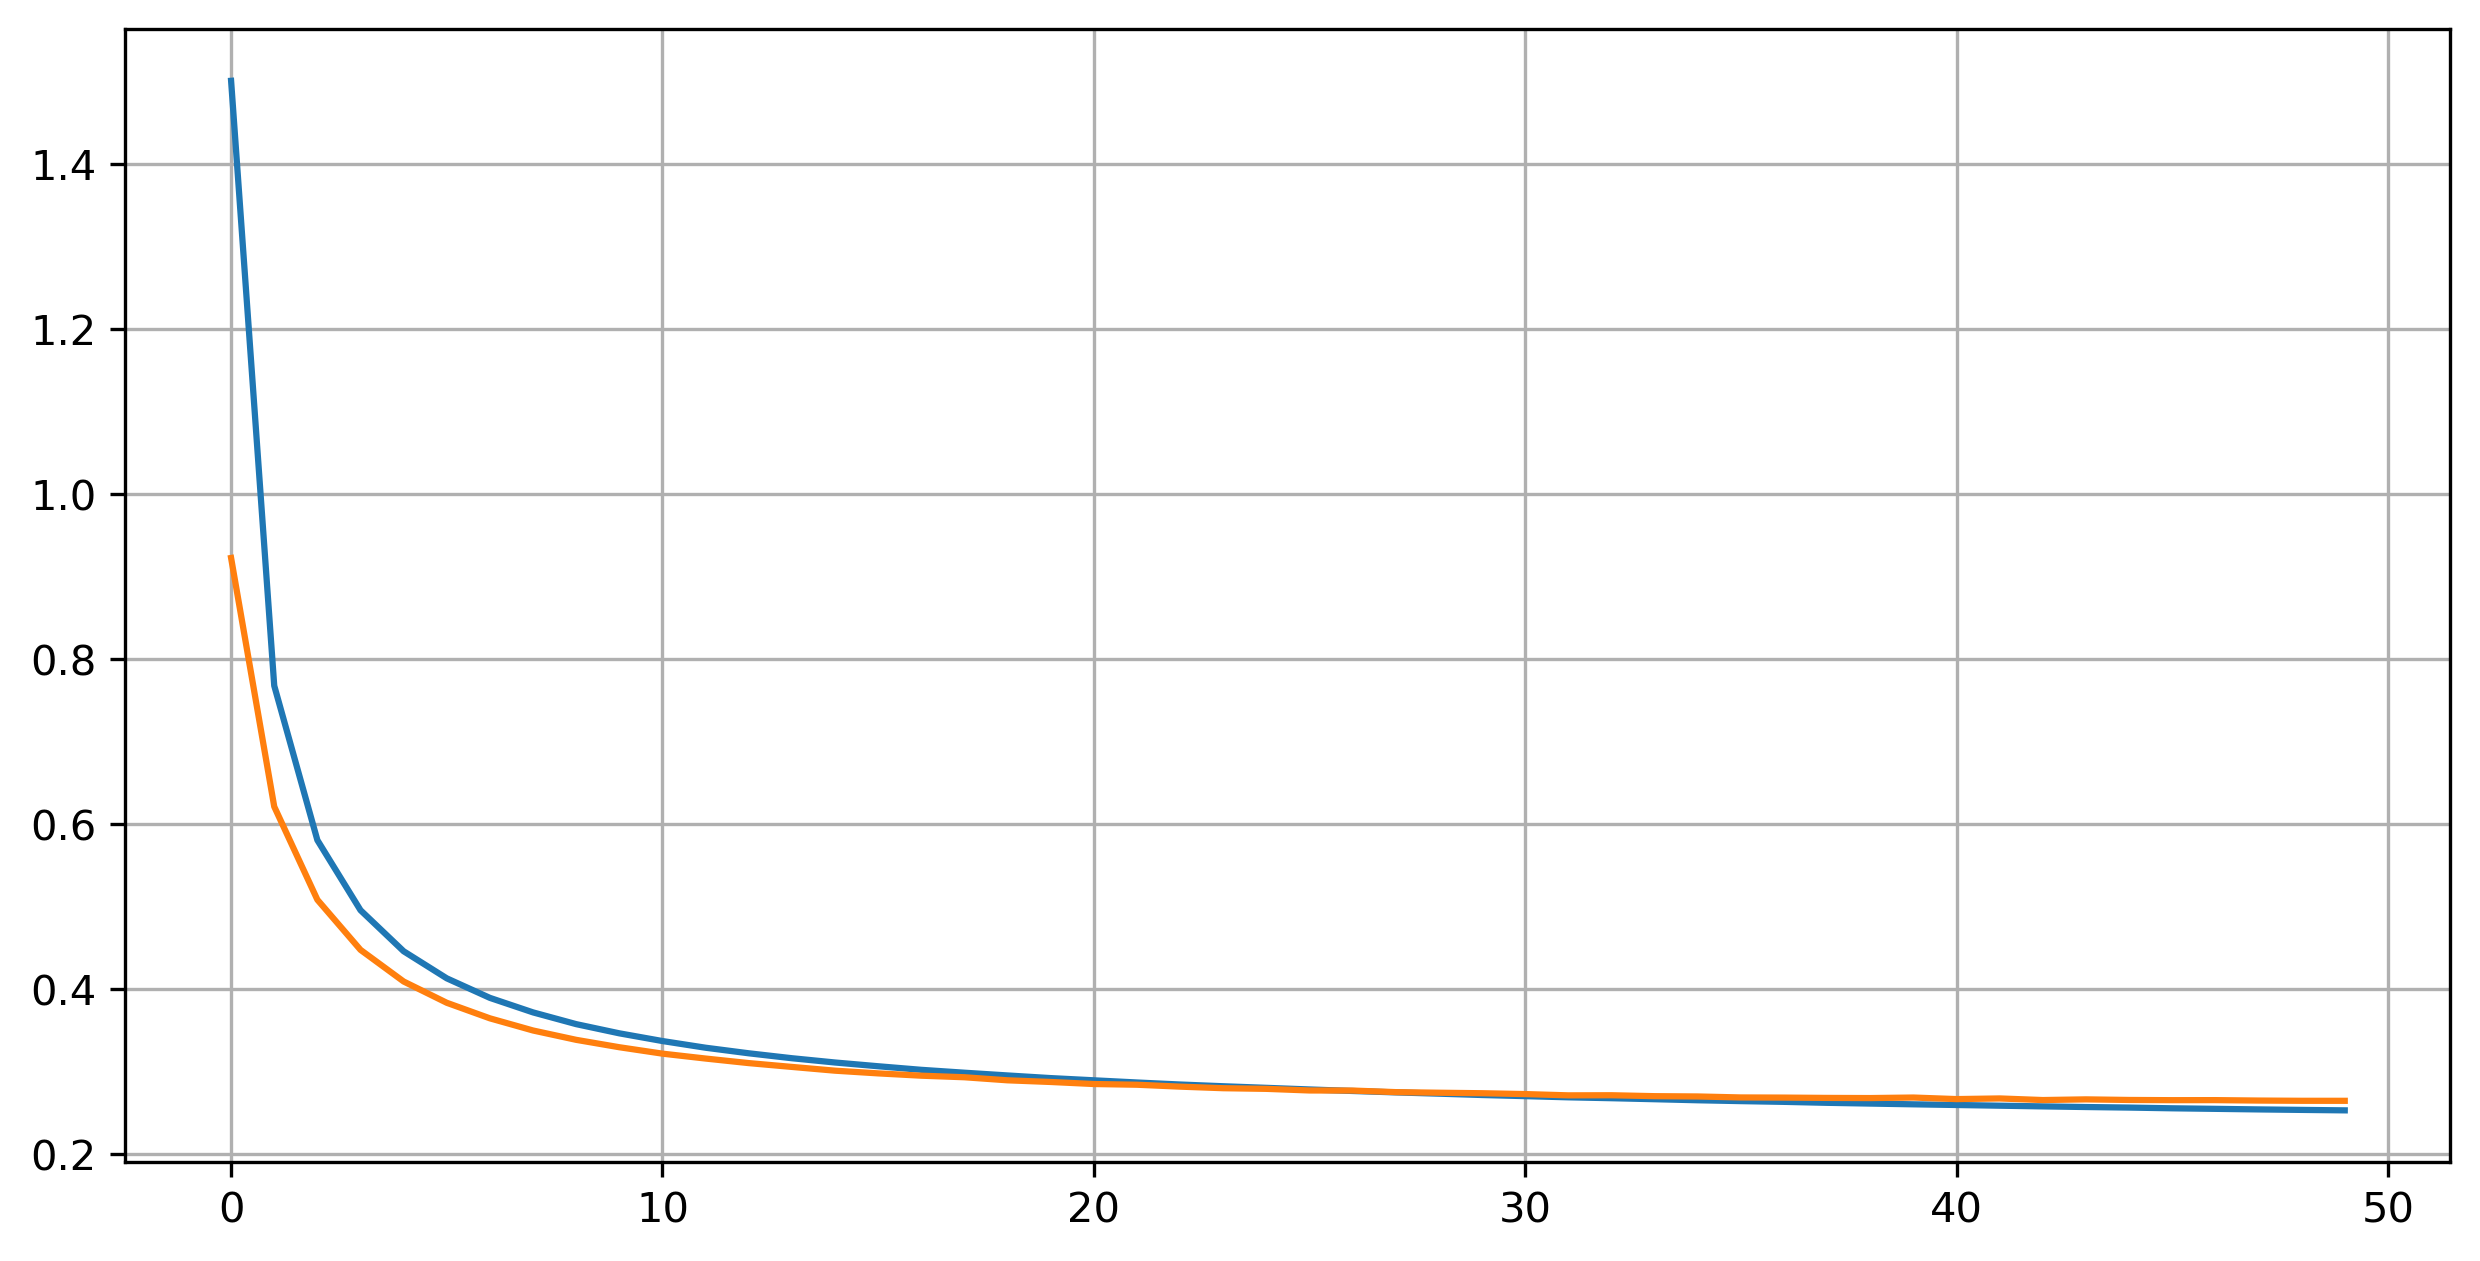

In [21]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
model.summary()

In [40]:
import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *

class QuantumCircuit:
    """ 
    This class provides a simple interface for interaction 
    with the quantum circuit 
    """
    
    def __init__(self, n_qubits, backend, shots):
        # --- Circuit definition ---
        self._circuit = qiskit.QuantumCircuit(n_qubits)
        
        all_qubits = [i for i in range(n_qubits)]
        self.theta = qiskit.circuit.Parameter('theta')
        
        self._circuit.h(all_qubits)
        self._circuit.barrier()
        self._circuit.ry(self.theta, all_qubits)
        
        self._circuit.measure_all()
        # ---------------------------

        self.backend = backend
        self.shots = shots
    
    def run(self, thetas):
        t_qc = transpile(self._circuit,
                         self.backend)
        qobj = assemble(t_qc,
                        shots=self.shots,
                        parameter_binds = [{self.theta: theta} for theta in thetas])
        job = self.backend.run(qobj)
        result = job.result().get_counts()
        
        counts = np.array(list(result.values()))
        states = np.array(list(result.keys())).astype(float)
        
        # Compute probabilities for each state
        probabilities = counts / self.shots
        # Get state expectation
        expectation = np.sum(states * probabilities)
        
        return np.array([expectation])
    
class HybridFunction(Function):
    """ Hybrid quantum - classical function definition """
    
    @staticmethod
    def forward(ctx, input, quantum_circuit, shift):
        """ Forward pass computation """
        ctx.shift = shift
        ctx.quantum_circuit = quantum_circuit

        expectation_z = ctx.quantum_circuit.run(input[0].tolist())
        result = torch.tensor([expectation_z])
        ctx.save_for_backward(input, result)

        return result
        
    @staticmethod
    def backward(ctx, grad_output):
        """ Backward pass computation """
        input, expectation_z = ctx.saved_tensors
        input_list = np.array(input.tolist())
        
        shift_right = input_list + np.ones(input_list.shape) * ctx.shift
        shift_left = input_list - np.ones(input_list.shape) * ctx.shift
        
        gradients = []
        for i in range(len(input_list)):
            expectation_right = ctx.quantum_circuit.run(shift_right[i])
            expectation_left  = ctx.quantum_circuit.run(shift_left[i])
            
            gradient = torch.tensor([expectation_right]) - torch.tensor([expectation_left])
            gradients.append(gradient)
        gradients = np.array([gradients]).T
        return torch.tensor([gradients]).float() * grad_output.float(), None, None

class Hybrid(nn.Module):
    """ Hybrid quantum - classical layer definition """
    
    def __init__(self, backend, shots, shift):
        super(Hybrid, self).__init__()
        self.quantum_circuit = QuantumCircuit(1, backend, shots)
        self.shift = shift
        
    def forward(self, input):
        return HybridFunction.apply(input, self.quantum_circuit, self.shift)

In [41]:
from keras.layers import Layer

class custom_layer(Layer):
  #  инициализируется переменная класса и переменная суперкласса
  def  __init__(self,output_dim, backend, shots, shift, **kwargs):
    super(custom_layer, self).__init__(**kwargs)
    self.output_dim = output_dim
    self.quantum_circuit = QuantumCircuit(1, backend, shots)
    self.shift = shift
    
  def build(self,input_shape):
    # определяются веса
    self.W=self.add_weight(name="kernel",
                           shape=(input_shape[1],
                           self.output_dim),
                           initializer="uniform",
                           trainable=True)
    self.built = True
    
  def forward(self, input):
    return HybridFunction.apply(input, self.quantum_circuit, self.shift)
    
  def call(self,x):
    # определяется алгоритм вычислений. В качестве аргумента принимается тензор
    return backend.dot(x,self.W)

  def compute_output_shape(self,input_shape):
    # определяется форма вывода слоя
    return (input_shape[0], self.output_dim)

In [59]:
input_img = Input((num_pixels, ))
x = Dense(100, activation='relu')(input_img)
# инйиализируем кстомный слой параметрами которые на нужны
#mu_l = custom_layer(100,                                     # output_dim
#                    qiskit.Aer.get_backend('aer_simulator'), # backend
#                    100,                                     # shots
#                    np.pi/2)(x)                              # shift

end = Dense(num_classes, 
            activation = 'softmax',
            kernel_regularizer   = tf.keras.regularizers.L1(0.01),
            activity_regularizer = tf.keras.regularizers.L2(0.01))(x)

model = Model(input_img, end)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
history = model.fit(X_train,
          y_train,
          epochs=50,
          batch_size=1024,
          shuffle=True,
          validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/50
59/59 [==============================] - 1s 9ms/step - loss: 1.9369 - accuracy: 0.7741 - val_loss: 1.3123 - val_accuracy: 0.8957
Epoch 2/50
59/59 [==============================] - 0s 7ms/step - loss: 1.1494 - accuracy: 0.8962 - val_loss: 0.9812 - val_accuracy: 0.9111
Epoch 3/50
59/59 [==============================] - 0s 7ms/step - loss: 0.8984 - accuracy: 0.9061 - val_loss: 0.7957 - val_accuracy: 0.9136
Epoch 4/50
59/59 [==============================] - 0s 7ms/step - loss: 0.7502 - accuracy: 0.9107 - val_loss: 0.6828 - val_accuracy: 0.9175
Epoch 5/50
59/59 [==============================] - 0s 7ms/step - loss: 0.6570 - accuracy: 0.9139 - val_loss: 0.6078 - val_accuracy: 0.9187
Epoch 6/50
59/59 [==============================] - 0s 7ms/step - loss: 0.5913 - accuracy: 0.9172 - val_loss: 0.5540 - val_accuracy: 0.9209
Epoch 7/50
59/59 [==============================] - 0s 7ms/step - loss: 0.5433 - accuracy: 0.9207 - val_loss: 0.5133 - val_accuracy: 0.9233
Epoch 8/50
59/59 [==

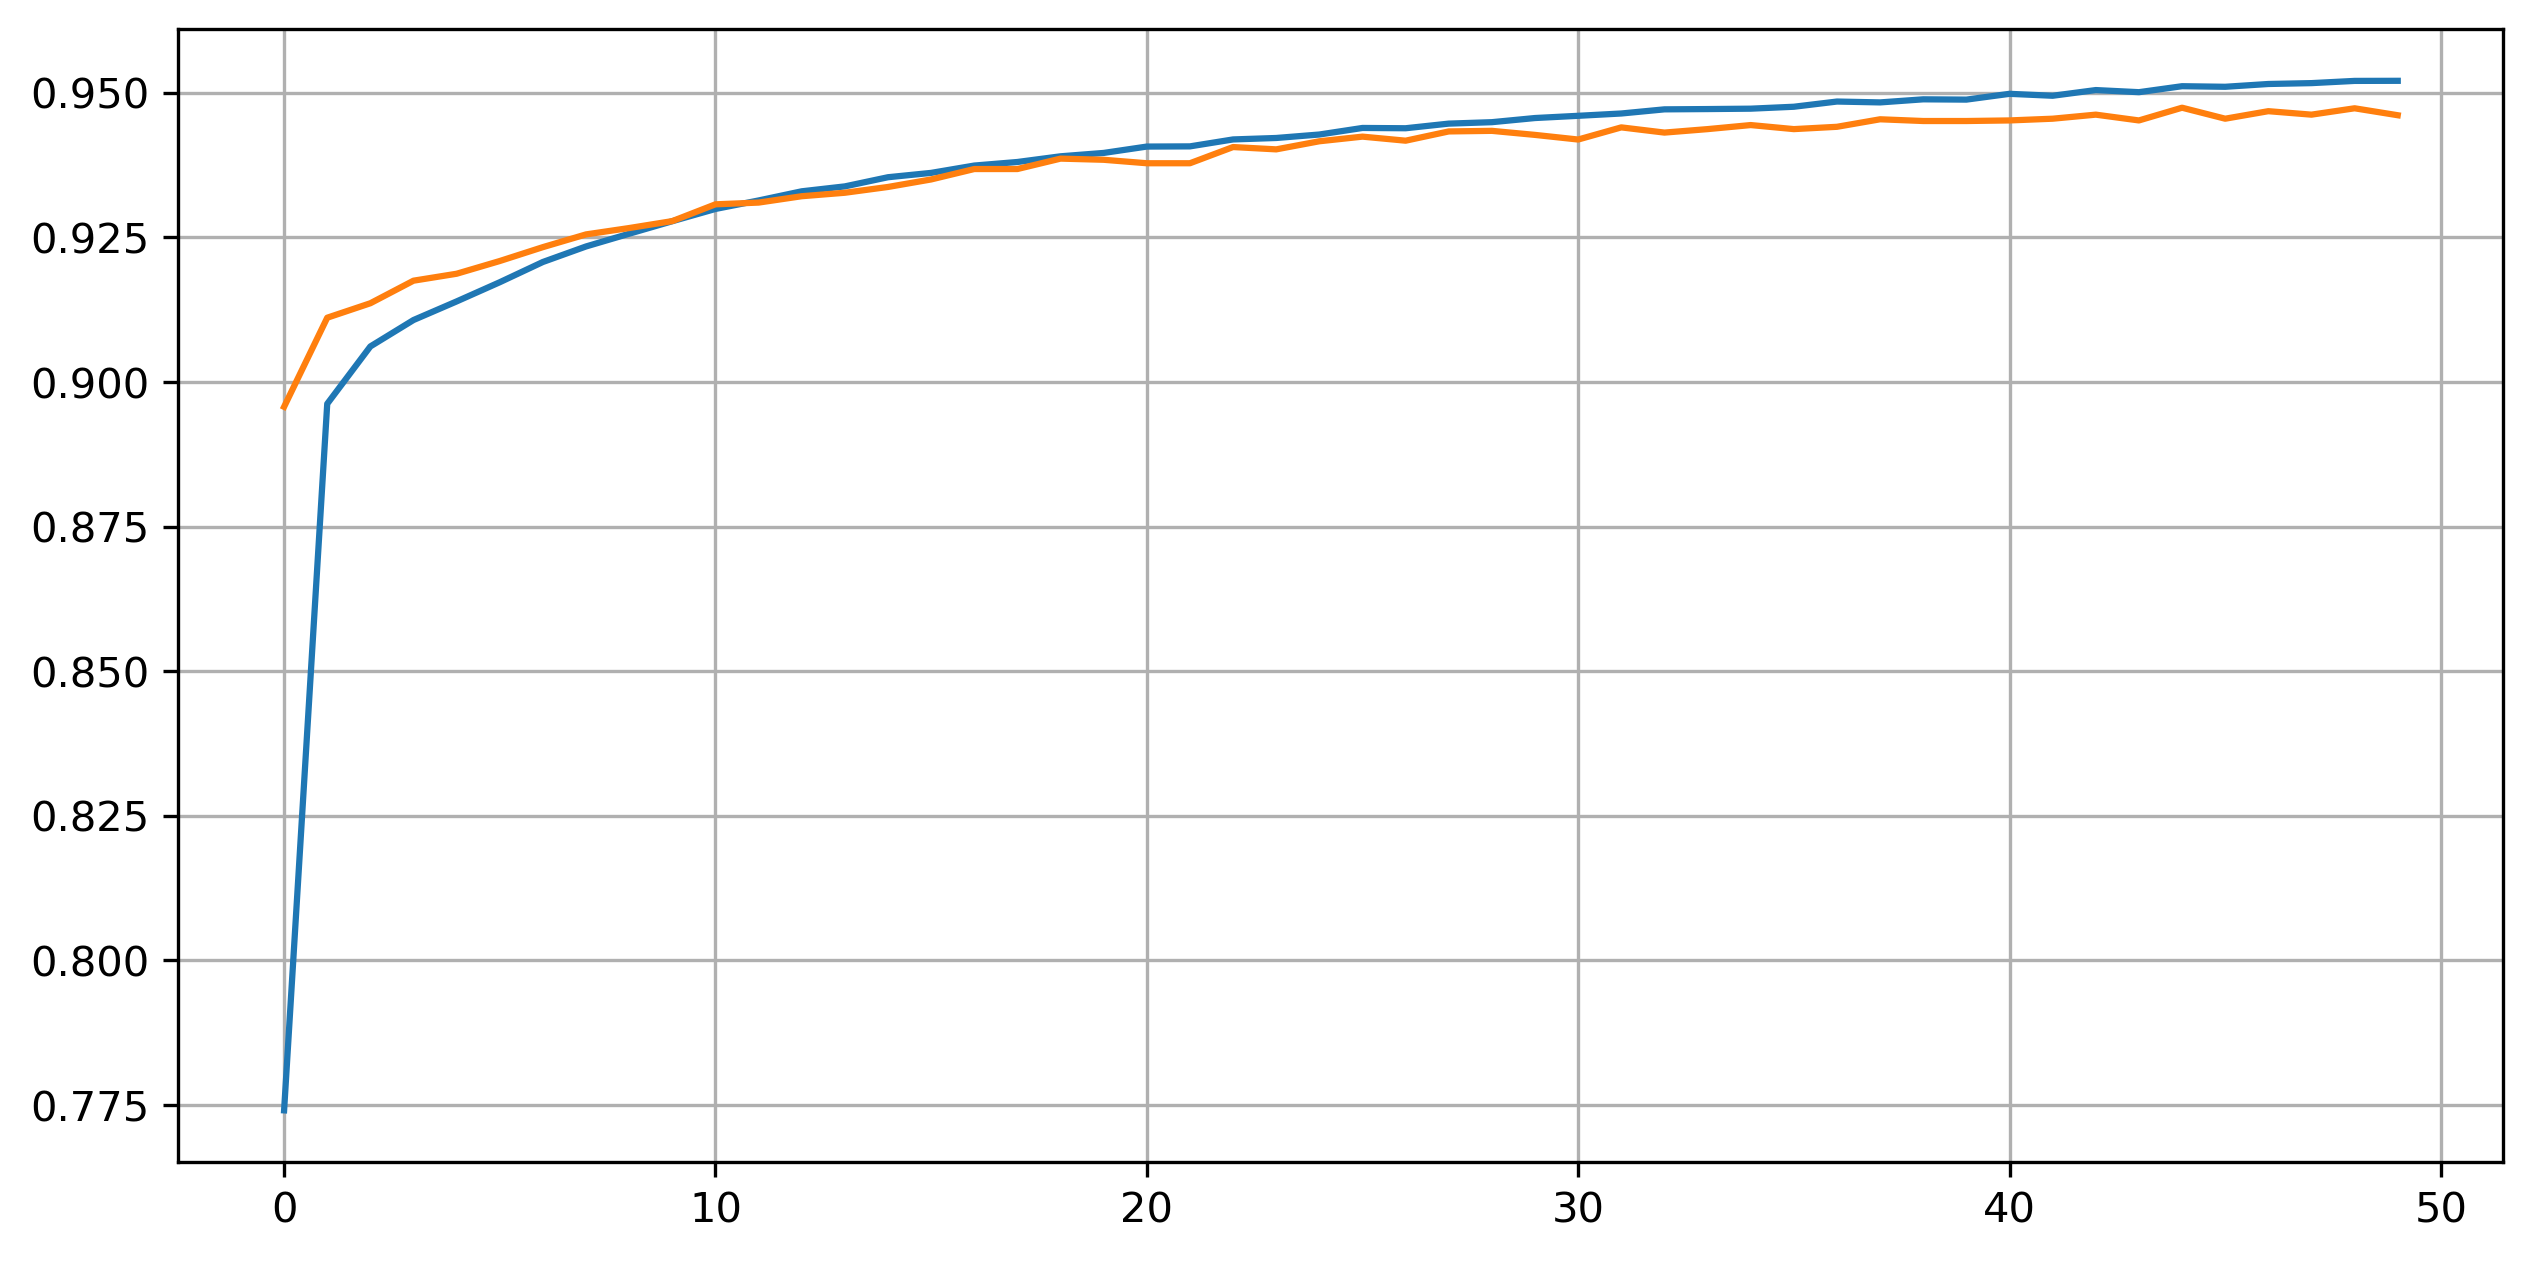

In [61]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()

In [52]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 custom_layer_4 (custom_laye  (None, 100)              10000     
 r)                                                              
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,510
Trainable params: 89,510
Non-trainable params: 0
_________________________________________________________________


In [53]:
input_img = Input((num_pixels, ))
x = Dense(700, activation='relu')(input_img)
x = Dense(100, activation='relu')(x)
end = Dense(num_classes, activation='softmax')(x)

model = Model(input_img, end)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,
          y_train,
          epochs=150,
          batch_size=1024,
          shuffle=True,
          validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/150
59/59 [==============================] - 2s 21ms/step - loss: 0.4871 - accuracy: 0.8698 - val_loss: 0.2046 - val_accuracy: 0.9378
Epoch 2/150
59/59 [==============================] - 1s 19ms/step - loss: 0.1711 - accuracy: 0.9514 - val_loss: 0.1464 - val_accuracy: 0.9541
Epoch 3/150
59/59 [==============================] - 1s 20ms/step - loss: 0.1190 - accuracy: 0.9657 - val_loss: 0.1107 - val_accuracy: 0.9664
Epoch 4/150
59/59 [==============================] - 1s 21ms/step - loss: 0.0877 - accuracy: 0.9751 - val_loss: 0.0930 - val_accuracy: 0.9712
Epoch 5/150
59/59 [==============================] - 1s 21ms/step - loss: 0.0665 - accuracy: 0.9809 - val_loss: 0.0793 - val_accuracy: 0.9766
Epoch 6/150
59/59 [==============================] - 1s 20ms/step - loss: 0.0529 - accuracy: 0.9853 - val_loss: 0.0712 - val_accuracy: 0.9780
Epoch 7/150
59/59 [==============================] - 1s 21ms/step - loss: 0.0407 - accuracy: 0.9889 - val_loss: 0.0687 - val_accuracy: 0.9793
Epoch 

59/59 [==============================] - 1s 21ms/step - loss: 1.0236e-04 - accuracy: 1.0000 - val_loss: 0.0797 - val_accuracy: 0.9837
Epoch 58/150
59/59 [==============================] - 1s 21ms/step - loss: 9.6564e-05 - accuracy: 1.0000 - val_loss: 0.0798 - val_accuracy: 0.9837
Epoch 59/150
59/59 [==============================] - 1s 21ms/step - loss: 9.1400e-05 - accuracy: 1.0000 - val_loss: 0.0804 - val_accuracy: 0.9836
Epoch 60/150
59/59 [==============================] - 1s 21ms/step - loss: 8.8022e-05 - accuracy: 1.0000 - val_loss: 0.0809 - val_accuracy: 0.9836
Epoch 61/150
59/59 [==============================] - 1s 20ms/step - loss: 8.3205e-05 - accuracy: 1.0000 - val_loss: 0.0811 - val_accuracy: 0.9835
Epoch 62/150
59/59 [==============================] - 1s 20ms/step - loss: 7.9158e-05 - accuracy: 1.0000 - val_loss: 0.0813 - val_accuracy: 0.9837
Epoch 63/150
59/59 [==============================] - 1s 20ms/step - loss: 7.5552e-05 - accuracy: 1.0000 - val_loss: 0.0818 - val_a

Epoch 113/150
59/59 [==============================] - 1s 20ms/step - loss: 9.6861e-06 - accuracy: 1.0000 - val_loss: 0.0967 - val_accuracy: 0.9836
Epoch 114/150
59/59 [==============================] - 1s 20ms/step - loss: 9.3702e-06 - accuracy: 1.0000 - val_loss: 0.0966 - val_accuracy: 0.9839
Epoch 115/150
59/59 [==============================] - 1s 20ms/step - loss: 8.9656e-06 - accuracy: 1.0000 - val_loss: 0.0965 - val_accuracy: 0.9842
Epoch 116/150
59/59 [==============================] - 1s 19ms/step - loss: 8.6896e-06 - accuracy: 1.0000 - val_loss: 0.0970 - val_accuracy: 0.9838
Epoch 117/150
59/59 [==============================] - 1s 19ms/step - loss: 8.3474e-06 - accuracy: 1.0000 - val_loss: 0.0971 - val_accuracy: 0.9839
Epoch 118/150
59/59 [==============================] - 1s 20ms/step - loss: 8.0660e-06 - accuracy: 1.0000 - val_loss: 0.0975 - val_accuracy: 0.9840
Epoch 119/150
59/59 [==============================] - 1s 20ms/step - loss: 7.7918e-06 - accuracy: 1.0000 - val_

In [ ]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train,
          y_train,
          epochs=200,
          batch_size=1024,
          shuffle=True,
          validation_data=(X_test, y_test),
          verbose=1)

In [ ]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()

In [ ]:
input_img = Input((num_pixels, ))
x = Dense(700, activation='relu')(input_img)
x = Dropout(0.5)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)
end = Dense(num_classes, activation='softmax')(x)

model = Model(input_img, end)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,
          y_train,
          epochs=50,
          batch_size=128,
          shuffle=True,
          validation_data=(X_test, y_test),
          verbose=1)

# Convolution

In [ ]:
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

In [ ]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(30, (5, 5), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(16, (5, 5), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
end = Dense(10, activation='softmax')(x)

model = Model(input_img, end)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,
          y_train,
          epochs=50,
          batch_size=1024,
          shuffle=True,
          validation_data=(X_test, y_test),
          verbose=1)

In [ ]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
model.summary()

In [ ]:
model.get_weights()

In [ ]:
model.predict(X_test)[0]

In [ ]:
def s(a, b, c, d):
    return (a*b)+(c*d)

In [ ]:
s(**{'a': 2, 'c': 3, 'b': 4, 'd':5})

In [ ]:
type((1, ))

In [ ]:
class MyLayer(tf.keras.layers.Layer):
    def __init__(self, units=10, **kvargs):
        self.units = units
        super(MyLayer, self).__init__(**kvargs)
    
    def build(self, input_shape):
        self.w = self.add_weight((input_shape[-1], self.units),
                                dtype=tf.float32,
                                trainable=True,
                                initializer='ones')
        self.b = tf.Variable(np.zeros((self.units, ), dtype=np.float32),
                             trainable=True)
    
    def call(self, inputs):
        inputs = tf.cast(inputs, 'float32')
        result = w @ inputs + b
        return result
    

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
gpu = tf.config.list_physical_devices('GPU')[0]
tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
a = np.random.random(size=(1000, 1000))
b = np.random.random(size=(1000, 1000))
b

In [ ]:
a * b

In [ ]:
(a @ b == np.dot(a, b)).all()

In [ ]:
%%timeit
a @ b

In [ ]:
a = tf.Variable(a)
b = tf.Variable(b)
b

In [ ]:
%%timeit
a @ b

In [ ]:
v = tf.Variable(np.random.random((1000, 1)))

In [ ]:
v

In [ ]:
a @ v

In [ ]:
result = a.numpy()

In [ ]:
np.savetxt('file.txt', result)

In [ ]:
l = np.loadtxt('file.txt')

In [ ]:
l

In [ ]:
def func(a, b):
    c = a + b
    c = c * b
    c = a @ c
    return c @ b

In [ ]:
%%timeit
func(a, b)

In [ ]:
a_n = a.numpy()
b_n = a.numpy()

In [ ]:
%%timeit
func(a_n, b_n)

In [ ]:
@tf.function
def func_tf(a, b):
    c = a + b
    c = c * b
    c = a @ c
    return c @ b

In [ ]:
func_tf(a, b)

In [ ]:
%%timeit
func_tf(a, b)